In [1]:
import nibabel as nib
import numpy as np 
import nilearn.plotting as niplt 
import matplotlib.pyplot as plt 
%matplotlib inline
import os 

In [2]:
d="/jukebox/griffiths/bert-brains/results/difference_maps/"
def view_comparison_maps(model,super_name,threshold=0.95,vmax=0):
    if model=='bert-base-uncased':
        names=['BERT_Semantic_1_'+str(i) for i in range(12)]
        names+=['BERT_'+x for x in ['Semantic_2','Distance_1','Distance_2','Distance_3','Distance_4','Direction_1','Direction_2','Direction_3','Direction_4']]
    else:
        names=['GPT2_Semantic_1_'+str(i) for i in range(12)]
        names=['GPT2_'+x for x in ['Semantic_2','Distance_1','Distance_2','Distance_3','Distance_4','Direction_1','Direction_2','Direction_3','Direction_4']]

    for name in names:
        fname=d+name 
        t_nii=nib.load(fname+"_"+super_name+"_tvalues.nii.gz")
        affine=t_nii.affine 
        t_volume=t_nii.get_fdata()
        #print(np.sum(t_volume<0))
        if threshold>0:
            p_volume=nib.load(fname+"_"+super_name+"_pvalues.nii.gz").get_fdata()
            t_volume=t_volume*(p_volume>=threshold).astype('int')
        img=nib.Nifti1Image(t_volume,affine)
        if vmax>0:
            niplt.plot_glass_brain(img,title=name,colorbar=True,vmax=vmax,plot_abs=False)
        else:
            niplt.plot_glass_brain(img,title=name,colorbar=True,plot_abs=False)


/usr/people/sreejank/anaconda3/envs/fmri/lib/python3.7/site-packages/nilearn/plotting/displays.py:780: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
/usr/people/sreejank/anaconda3/envs/fmri/lib/python3.7/site-packages/nilearn/plotting/displays.py:602: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  facecolor=facecolor)


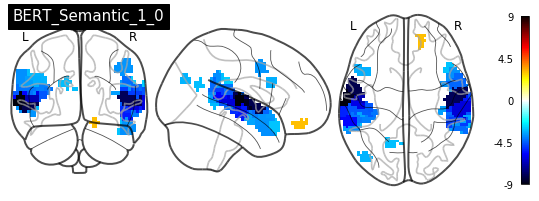

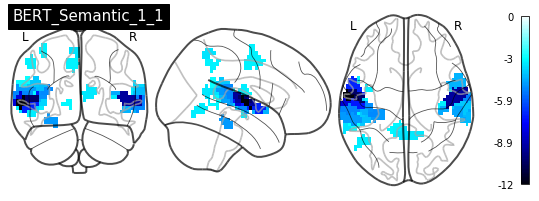

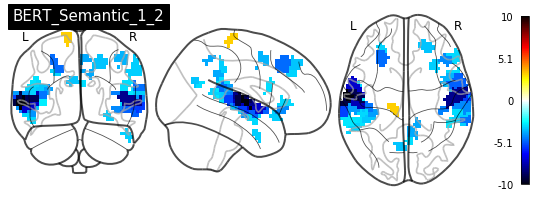

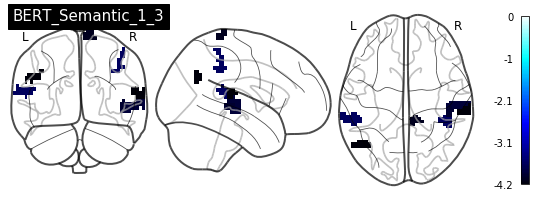

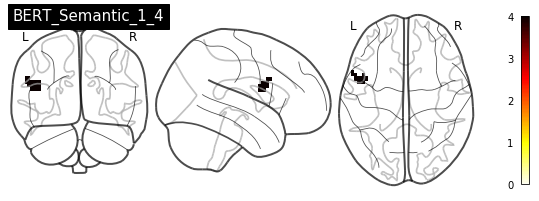

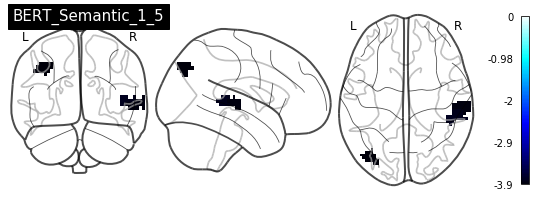

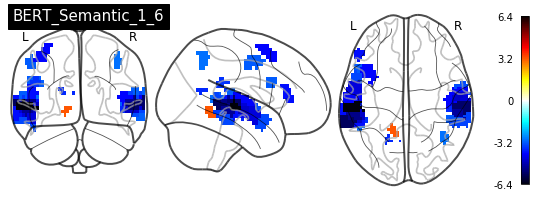

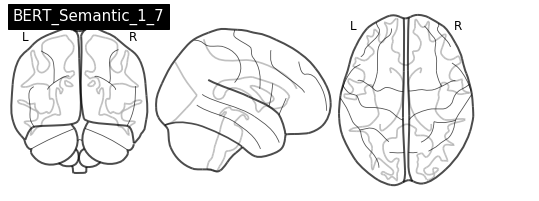

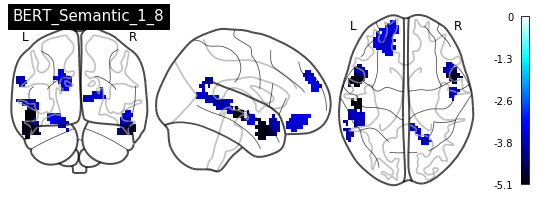

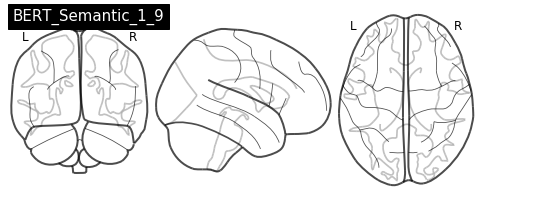

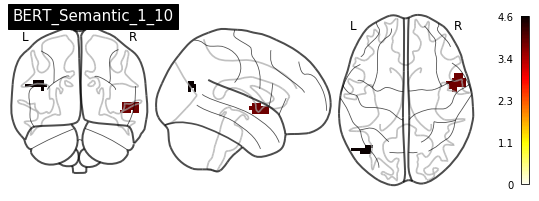

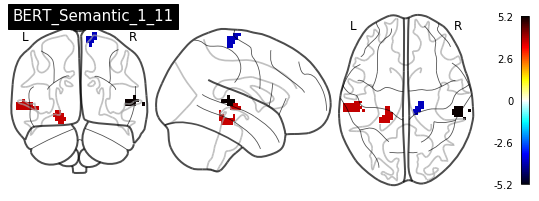

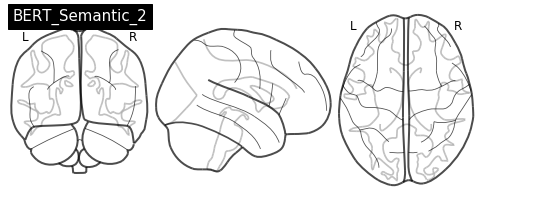

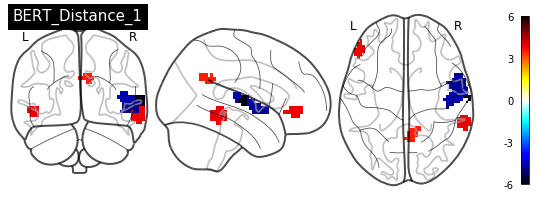

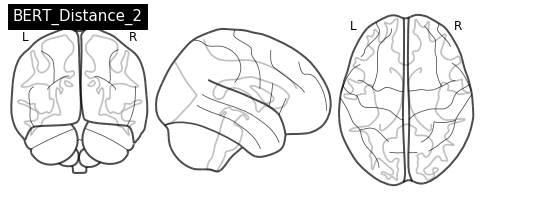

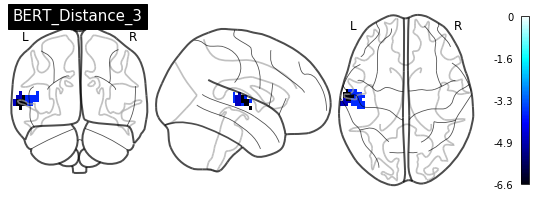

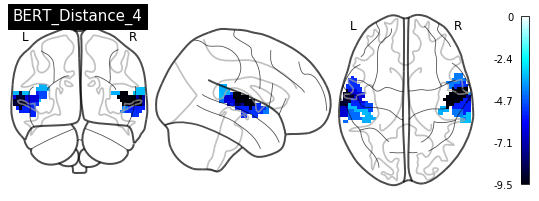

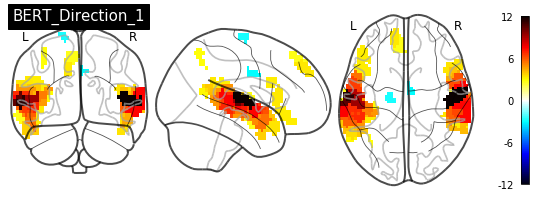

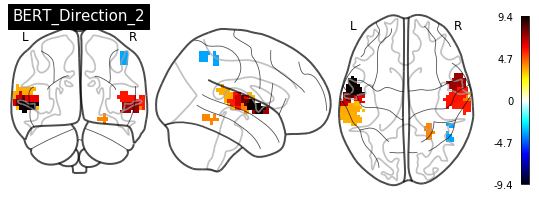

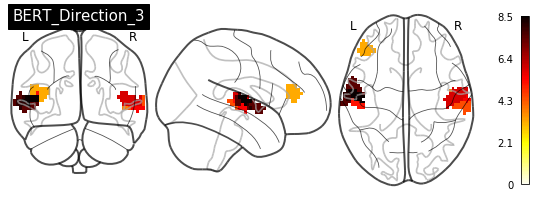

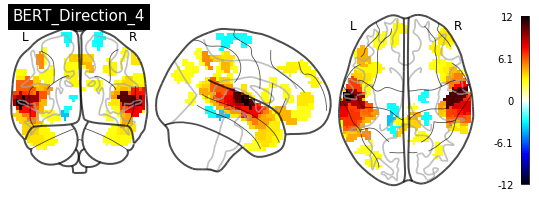

In [3]:
#Only Black
view_comparison_maps('bert-base-uncased','individual_black')

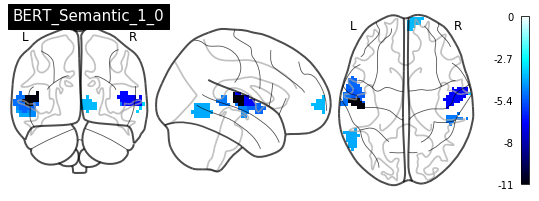

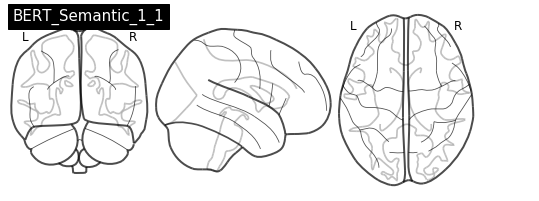

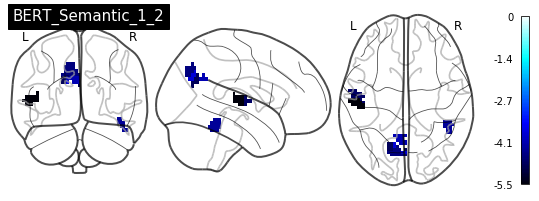

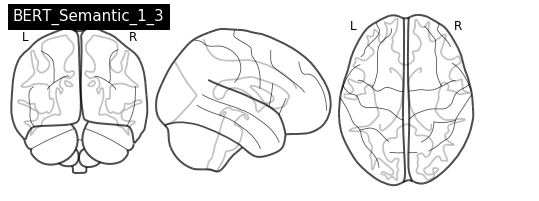

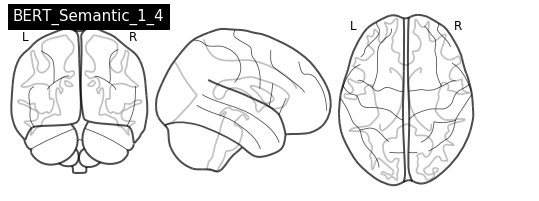

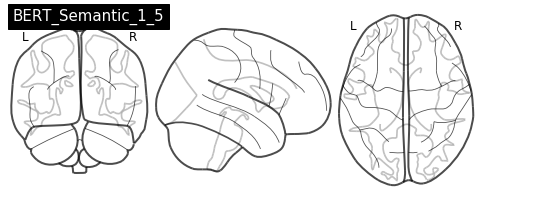

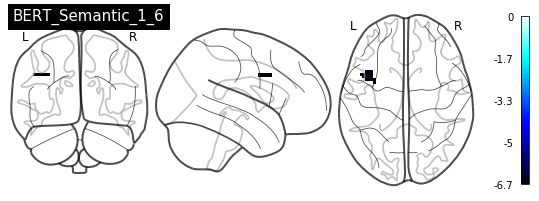

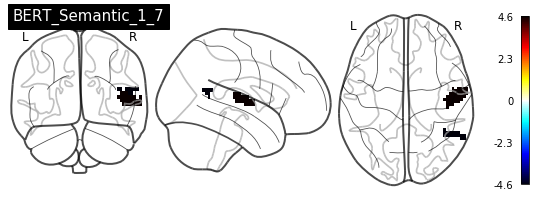

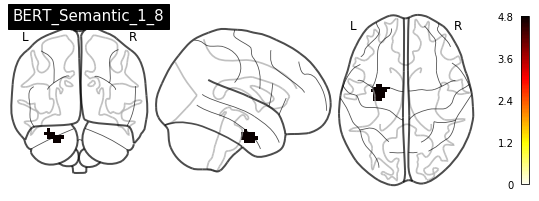

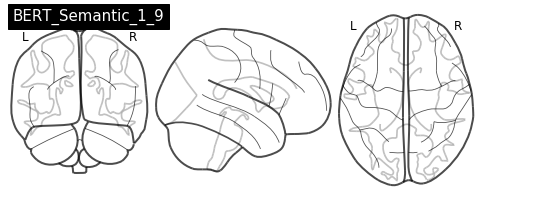

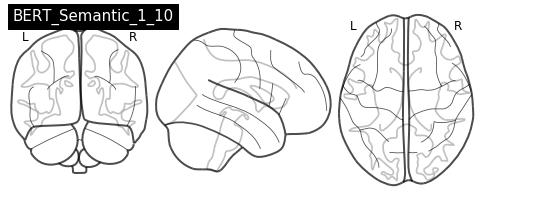

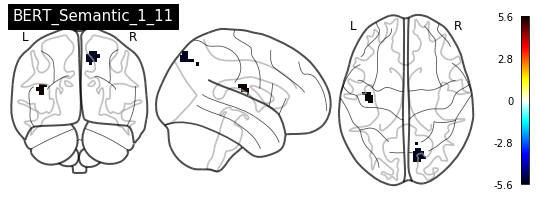

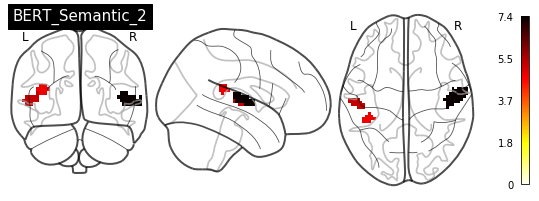

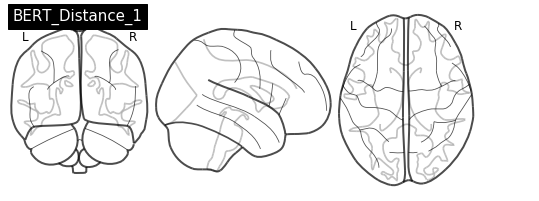

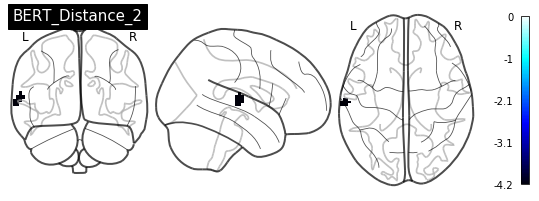

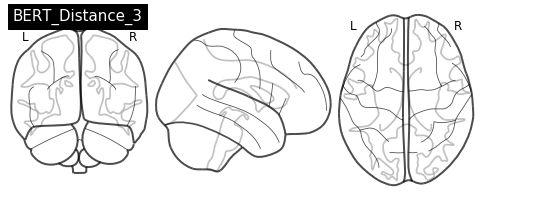

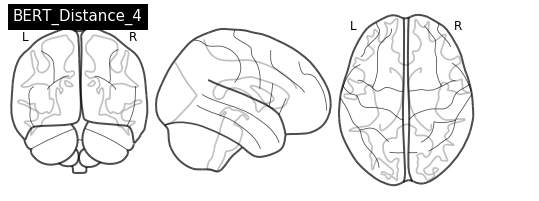

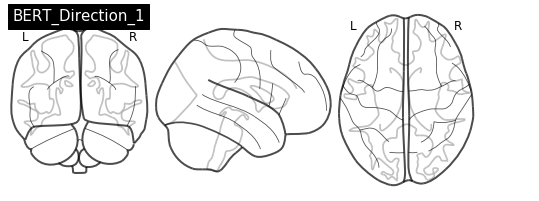

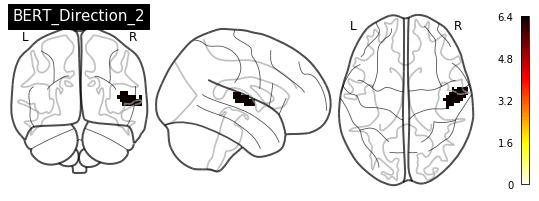

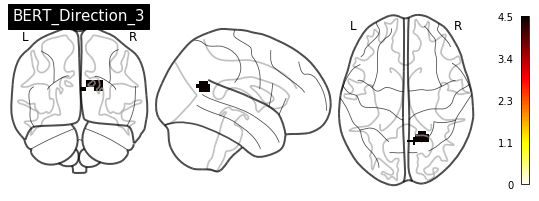

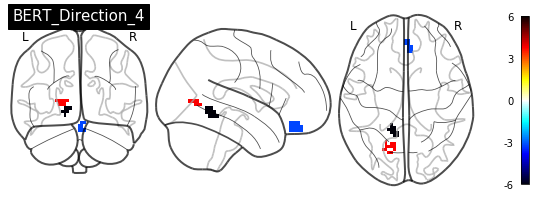

In [6]:
#Only Slumlord
view_comparison_maps('bert-base-uncased','individual_slumlord')

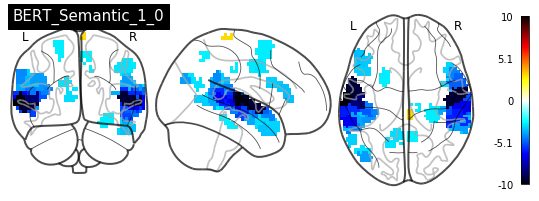

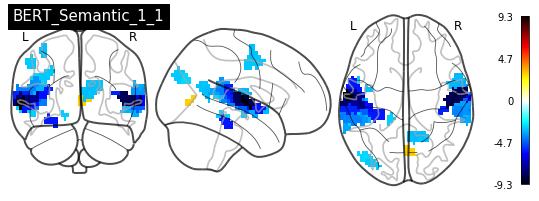

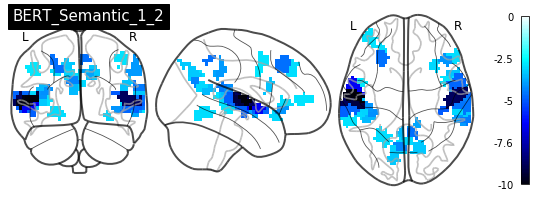

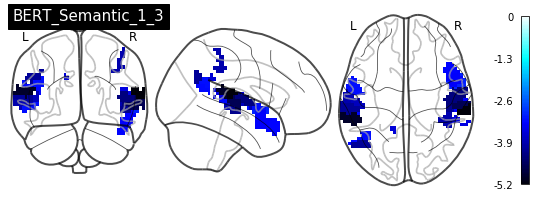

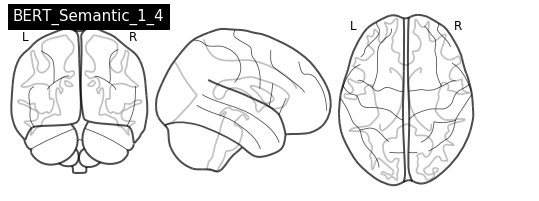

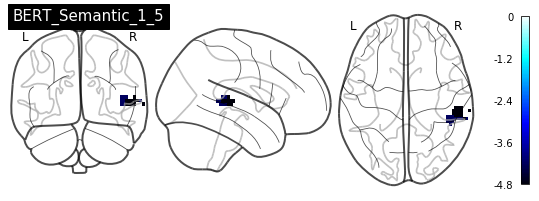

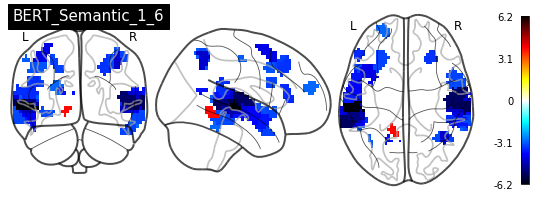

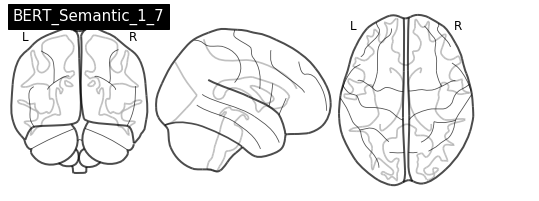

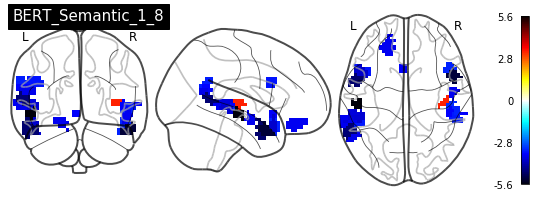

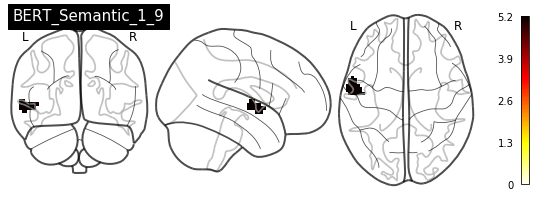

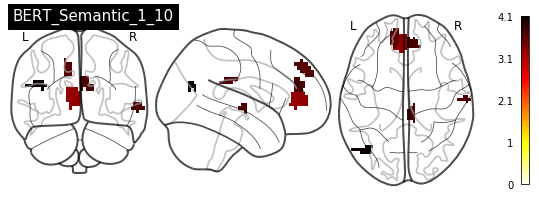

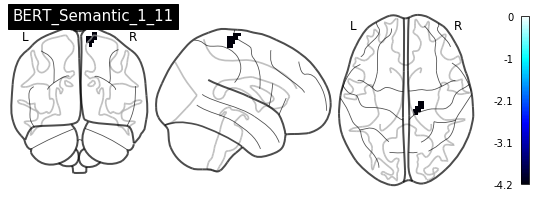

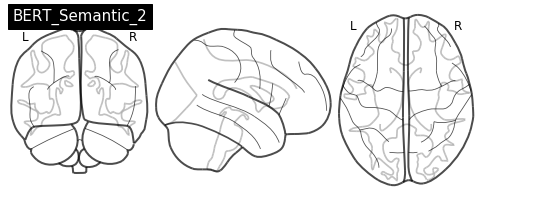

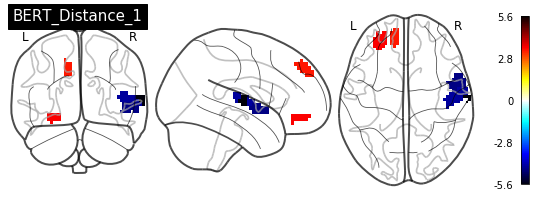

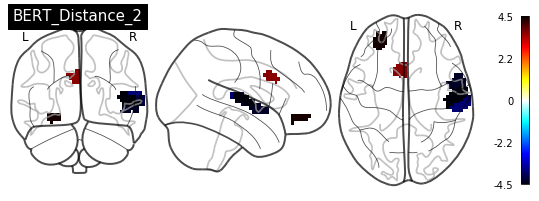

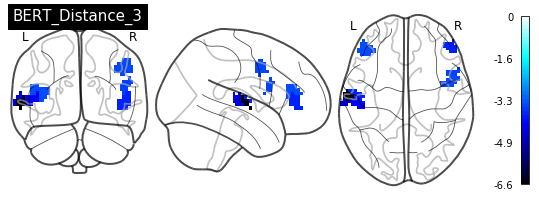

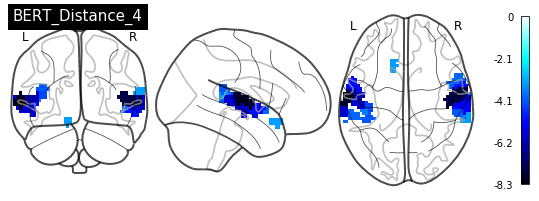

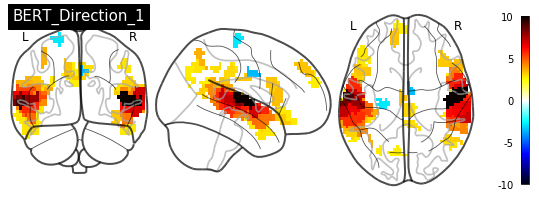

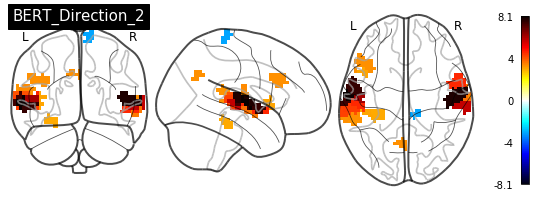

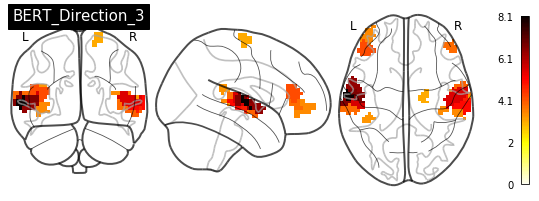

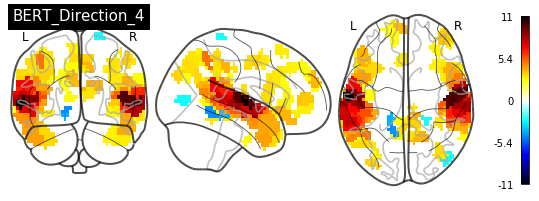

In [7]:
#Combined
view_comparison_maps('bert-base-uncased','combined')